# arbocartoR package and app: deterministic ODE model for Aedes dynamics and control

Usefull materials and links:
* [arbocartoR page](https://umr-astre.pages-forge.inrae.fr/training/arbocartoR/)
* [arobocarto page](https://www.arbocarto.fr/en/)


# Tutorial: How to use arbocartoR
This tutorial introduces the **arbocartoR** package, which simulates:
- Spatial and temporal dynamics of *Aedes* mosquito populations under natural and controlled conditions.
- Epidemiological dynamics of arboviruses (*dengue, zika, chikungunya*) across human and vector populations.

## Setup
Install arbocartoR package:

In [1]:
# remotes::install_gitlab("astre/arbocartoR", host = "https://gitlab.cirad.fr")

Load required packages:

In [2]:

suppressPackageStartupMessages({
  suppressWarnings({
    library(arbocartoR)
    library(data.table)
    library(magrittr)
    library(tidyterra)
    library(ggplot2)
    library(sf)
    library(TDLM)
  })
})


## General Data
The package requires two main datasets:
- **parcels**: each row is a node/parcel with attributes (ID: parcel unique identifier, POP: resident population, Kfix: fix/anthropogenic carrying capacity of the parcel, Kvar: variable/rainfall-dependant carying capacity, etc.).
- **meteo**: meteorological data (ID, DATE, rainfall `RR` - in mm, temperature `TP` - in degrees).

The structure and attributes of the data are detailled in the helpers.

In [3]:
# ? parcels

In [4]:
# ? meteo

An example for both datasets is provided in the package:

In [5]:
data(parcels)
data(meteo)

head(parcels)
head(meteo)

ID        NOM_COM SURF_HA   STATION DIFF_ALT   Kfix  Kvar  POP  ALT_M     
1 060010000 Aiglun  1538.7791 6081001 -707.06636  3874 28952   94  817.93364
2 060020000 Amirat  1296.6822 6081001 -515.94537  2664 23437   54 1009.05463
3 060030000 Andon   5435.6842 6081001 -279.32373 15442 98069  648 1245.67627
4 060040101 Antibes  218.0164 6004009   69.94415  8699 16365 1334  101.94415
5 060040102 Antibes  119.2201 6004004  116.39238  5470 10067 2447  129.39238
6 060040103 Antibes  386.6299 6004002  -41.71158 34682 65470  838   33.28842

ID      DATE       RR  TP    ALT_M    LON      LAT    
1 4006005 2021-01-01 6.2 -1.30 1517.101 989432.8 6355921
2 4006005 2021-01-02 0.0 -1.05 1517.101 989432.8 6355921
3 4006005 2021-01-03 0.0 -2.05 1517.101 989432.8 6355921
4 4006005 2021-01-04 2.2 -3.60 1517.101 989432.8 6355921
5 4006005 2021-01-05 0.0 -4.50 1517.101 989432.8 6355921
6 4006005 2021-01-06 0.0 -5.50 1517.101 989432.8 6355921

### Select a subset of parcels
Lets use only 4 parcels to run quick simulations.

In [6]:

parcels <- parcels[startsWith(ID, "06") & (grepl("Gatt", NOM_COM) | grepl("Saint-Jeannet", NOM_COM) | grepl("La Gaude", NOM_COM)), ]


### Run a simple simulation
Select the species of interest, inform the function with your parcels and meteo objects, as well as the temporal boundaries of the simulation. The period must be covered by the meteorological dataset and must last at least a year (for initialization purposes).
Note that the vector population dynamics is deterministic, running multiple simulations would produce identical outputs.

In [7]:
traj <- run_arbocartoR(
  vector = "Ae. aegypti",
  parcels = parcels,
  meteo = meteo,
  n_sim = 1,
  start_date = min(meteo$DATE) %>% as.Date,
  end_date = max(meteo$DATE) %>% as.Date
)

Parameters were based on Ae. aegypti ecology

Simulation will run for 4 parcels from 2021-01-01 to 2022-11-30

No human mobility considered (mMov = NULL)

## Generating parameters for all patches can take time, please be patient. ##



Explore the simulated trajectories compiled as a list of data.table with one data.table per simulation.

In [8]:
head(traj[[1]])

ID        DATE       time Sh   Em        newEggs Lm        Pm       Aemm   
1 060640000 2021-01-01 366  4173  849078.5 148475   532284.4  78972.3  5011.7
2 060650101 2021-01-01 366  3995 2043794.6 361445  1159249.5 184901.7 12235.5
3 060650102 2021-01-01 366  3015 1508629.4 302826   837492.7 136923.4  9290.5
4 061220000 2021-01-01 366  4246 1532628.2 265469  1033139.4 144190.3  8787.1
5 060640000 2021-01-02 367  4173  780098.4 136007   534179.5  76924.8  4493.7
6 060650101 2021-01-02 367  3995 1880791.1 332543  1159210.1 179957.8 10975.1
  A1hm   ⋯ A2gm     A2om   R0 interv_Am z temperature RR_day RR_7days kL   
1 2030.5 ⋯  55231.6 1570.6 0  0         1 3.906878    13.9   17.1     31066
2 4957.3 ⋯ 122114.9 3817.5 0  0         1 4.839654    13.9   17.1     60468
3 3589.3 ⋯  87961.1 3202.5 0  0         1 6.784695    23.8   30.5     45316
4 3562.0 ⋯ 106828.0 2812.0 0  0         1 3.153013    13.9   17.1     64557
5 1793.2 ⋯  55032.5 1453.1 0  0         1 4.356878     5.8   19.9     32534
6 4378.5 ⋯ 121922.4 3545.0 0  0         1 5.289654     5.8   19.9     62884
  kP   
1 31066
2 60468
3 45316
4 64557
5 32534
6 62884

 Use `plot_TS` function to visualize the trajectiories.

In [9]:
plot_TS(traj, stage = c("newEggs", "Em"))

HTML widgets cannot be represented in plain text (need html)

### Explore and update parameters
Default parameters used by arbocartoR for both *Ae. aegypti* and *Ae. albopictus* are detailed in  [Bonnin *et al.* 2022](https://doi.org/10.1289/EHP11068).

The parameters and functions are also described in the helper of the `build_gdata` function.

Explore the default parameters for *aegypti*.

In [10]:
# ?build_gdata()
gdata_default <- build_gdata(vector = "Ae. aegypti")

Parameters were based on Ae. aegypti ecology



You can update those parameters using the `build_gdata` function which will build and format the set of ecological and epidemiological parameters required by the model.

Try to update the egg mortality rate (`muE`) and transmission rate from mosquitoes to host (`bMH`) based on *Ae. aegypti* default parameters.

In [11]:
#Change parameters
gdata_updated <- build_gdata(vector = "Ae. aegypti",
            bMH = 0.5,
            muE = 0.001)

Parameters were based on Ae. aegypti ecology



Compare them:

In [12]:
gdata_default[c("bMH","muE","mu1L")]

gdata_updated[c("bMH","muE","mu1L")]

$bMH
[1] 0.33

$muE
[1] 0.01

$mu1L
[1] 7e-04

$bMH
[1] 0.5

$muE
[1] 0.001

$mu1L
[1] 7e-04

Run a simulation with those data

In [21]:
traj <- run_arbocartoR(
  vector = "Ae. aegypti",
  parcels = parcels,
  meteo = meteo,
  gdata = gdata_updated,
  n_sim = 1,
  start_date = min(meteo$DATE) %>% as.Date,
  end_date = max(meteo$DATE) %>% as.Date
)

head(traj[[1]])

plot_TS(traj, stage = "Em")

Simulation will run for 4 parcels from 2021-01-01 to 2022-11-30

No human mobility considered (mMov = NULL)

## Generating parameters for all patches can take time, please be patient. ##



ID        DATE       time Sh   Em        newEggs Lm        Pm       Aemm   
1 060640000 2021-01-01 366  4173  886444.1 149465   543758.0  80740.6  5095.2
2 060650101 2021-01-01 366  3995 2131167.7 363533  1183600.5 188896.6 12418.7
3 060650102 2021-01-01 366  3015 1574435.3 304421   856082.3 139848.6  9420.4
4 061220000 2021-01-01 366  4246 1601323.4 267389  1055803.1 147481.2  8942.6
5 060640000 2021-01-02 367  4173  816828.5 136949   546272.1  78645.9  4568.9
6 060650101 2021-01-02 367  3995 1966931.5 334559  1184742.5 183844.6 11140.4
  A1hm   ⋯ A2gm     A2om   R0 interv_Am z temperature RR_day RR_7days kL   
1 2064.9 ⋯  55419.5 1575.6 0  0         1 3.906878    13.9   17.1     31066
2 5032.5 ⋯ 122431.4 3826.7 0  0         1 4.839654    13.9   17.1     60468
3 3639.4 ⋯  88170.1 3209.6 0  0         1 6.784695    23.8   30.5     45316
4 3625.7 ⋯ 107242.0 2822.3 0  0         1 3.153013    13.9   17.1     64557
5 1823.3 ⋯  55229.0 1458.0 0  0         1 4.356878     5.8   19.9     32534
6 4444.6 ⋯ 122259.8 3554.2 0  0         1 5.289654     5.8   19.9     62884
  kP   
1 31066
2 60468
3 45316
4 64557
5 32534
6 62884

HTML widgets cannot be represented in plain text (need html)

## Local Preventive Control
Initialize dataset for preventive control actions.
Preventive control measures should be described in a data.frame or data.table using the mandatory following columns: 'action', 'loc', 'start', 'end', 'p'.

### Define control actions

In [14]:
prev_control <- data.table(
  action = character(),
  loc = factor(),
  start = structure(numeric(0), class = "Date"),
  end = structure(numeric(0), class = "Date"),
  p = numeric()
)

# Reduce carrying capacity (breeding sites destruction)
prev_control <- rbindlist(list(prev_control, data.table(
  action = "K",
  loc = "060640000",
  start = as.Date("2022/07/01"),
  end = as.Date("2022/07/07"),
  p = 0.2
)), fill = TRUE)

# Increase larvae mortality (larviciding)
prev_control <- rbindlist(list(prev_control, data.table(
  action = "L",
  loc = "060640000",
  start = as.Date("2022/07/01"),
  end = as.Date("2022/07/07"),
  p = 0.2
)), fill = TRUE)

prev_control <- rbindlist(list(prev_control, data.table(
  action = "L",
  loc = "061220000",
  start = as.Date("2022/07/07"),
  end = as.Date("2022/07/15"),
  p = 0.5
)), fill = TRUE)

# Increase adult mortality (fumigation)
prev_control <- rbindlist(list(prev_control, data.table(
  action = "A",
  loc = "061220000",
  start = as.Date("2022/07/01"),
  end = as.Date("2022/07/07"),
  p = 0.2
)), fill = TRUE)

prev_control <- rbindlist(list(prev_control, data.table(
  action = "A",
  loc = "060640000",
  start = as.Date("2022/07/01"),
  end = as.Date("2022/07/07"),
  p = 0.8
)), fill = TRUE)


You can also use `build_prev_control()` function to format it using GPS coordinates and buffer width (area covered by the control activities). 
A SpatVector object is required to calculate the spatial intersection between the parcels and the area covered by the control activities.

In [15]:
SpatVec <- system.file("shape/SpatVec.shp", package = "arbocartoR") %>% terra::vect(.)
SpatVec <- SpatVec[SpatVec$ID %in% parcels$ID, ]

prev_control_func <- build_prev_control(action = c("K", "L"),
                   lon = 1034406, lat = 6306132,
                   start = as.Date("2022/07/01"),
                   end = as.Date("2022/07/07"),
                   p = c(0.2, 0.8),
                   SpatVec = SpatVec,
                   buffer_width = 100)

### Run simulation with preventive control

In [26]:
traj <- run_arbocartoR(
  vector = "Ae. aegypti",
  parcels = parcels,
  meteo = meteo,
  n_sim = 1,
  start_date = min(meteo$DATE) %>% as.Date,
  end_date = max(meteo$DATE) %>% as.Date,
  prev_control = prev_control
)

traj_noControl <- run_arbocartoR(
  vector = "Ae. aegypti",
  parcels = parcels,
  meteo = meteo,
  n_sim = 1,
  start_date = min(meteo$DATE) %>% as.Date,
  end_date = max(meteo$DATE) %>% as.Date
)

prev_control
names(traj[[1]])

traj[[1]]$Lm_nocontrol <- traj_noControl[[1]]$Lm
plot_TS(traj, stage = c("Lm", "Lm_nocontrol"))

traj[[1]]$newEggs_nocontrol <- traj_noControl[[1]]$newEggs
plot_TS(traj, stage = c("newEggs", "newEggs_nocontrol"))

Parameters were based on Ae. aegypti ecology

Simulation will run for 4 parcels from 2021-01-01 to 2022-11-30

No human mobility considered (mMov = NULL)

## Generating parameters for all patches can take time, please be patient. ##

Parameters were based on Ae. aegypti ecology

Simulation will run for 4 parcels from 2021-01-01 to 2022-11-30

No human mobility considered (mMov = NULL)

## Generating parameters for all patches can take time, please be patient. ##



action loc       start      end        p   start_time end_time id
1 K      060640000 2022-07-01 2022-07-07 0.2 912        918      1 
2 L      060640000 2022-07-01 2022-07-07 0.2 912        918      2 
3 L      061220000 2022-07-07 2022-07-15 0.5 918        926      3 
4 A      061220000 2022-07-01 2022-07-07 0.2 912        918      4 
5 A      060640000 2022-07-01 2022-07-07 0.8 912        918      5

[1] "ID"          "DATE"        "time"        "Sh"          "Em"         
 [6] "newEggs"     "Lm"          "Pm"          "Aemm"        "A1hm"       
[11] "A1gm"        "A1om"        "A2hm"        "A2gm"        "A2om"       
[16] "R0"          "interv_Am"   "z"           "temperature" "RR_day"     
[21] "RR_7days"    "kL"          "kP"

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

## Introduction of Exposed Individuals
Define an introduction event modifying the epidemiological state of the population at a given time.

In [36]:
introduction_pts <- build_E_random(
  period_start = as.Date("2022/08/01"),
  period_end   = as.Date("2022/09/15"),
  n_ind = 10,
  n_events = 1,
  stage = "Eh",
  loc = parcels$ID
)

introduction_pts

traj <- run_arbocartoR(
  vector = "Ae. aegypti",
  parcels = parcels,
  meteo = meteo,
  n_sim = 5,
  start_date = as.Date("2022/01/01"),
  end_date = as.Date("2022/11/30"),
  introduction_pts = introduction_pts,
  initMosq = 1e5
)

plot_TS(traj, 
        stage = c("Eh", "Ih", "Rh", 'A2hmE'), 
        parcels_ids = introduction_pts$dest)

time       dest      n  select
1 2022-09-14 060640000 10 Eh

Parameters were based on Ae. aegypti ecology

Simulation will run for 4 parcels from 2022-01-01 to 2022-11-30

No human mobility considered (mMov = NULL)

## Generating parameters for all patches can take time, please be patient. ##



HTML widgets cannot be represented in plain text (need html)

## Human Mobility
Introduce human mobility between parcels based on the spatial structure of the area of interest, distribution law based on distance between parcels and resident population.

Checks

Turn to sf

Build mi, mj, Oi

Compute distance between patches



  |                                                                      |   0%


The inputs passed the format_and_names checks successfully!

Compute travelling distributions

Normalize probabilities



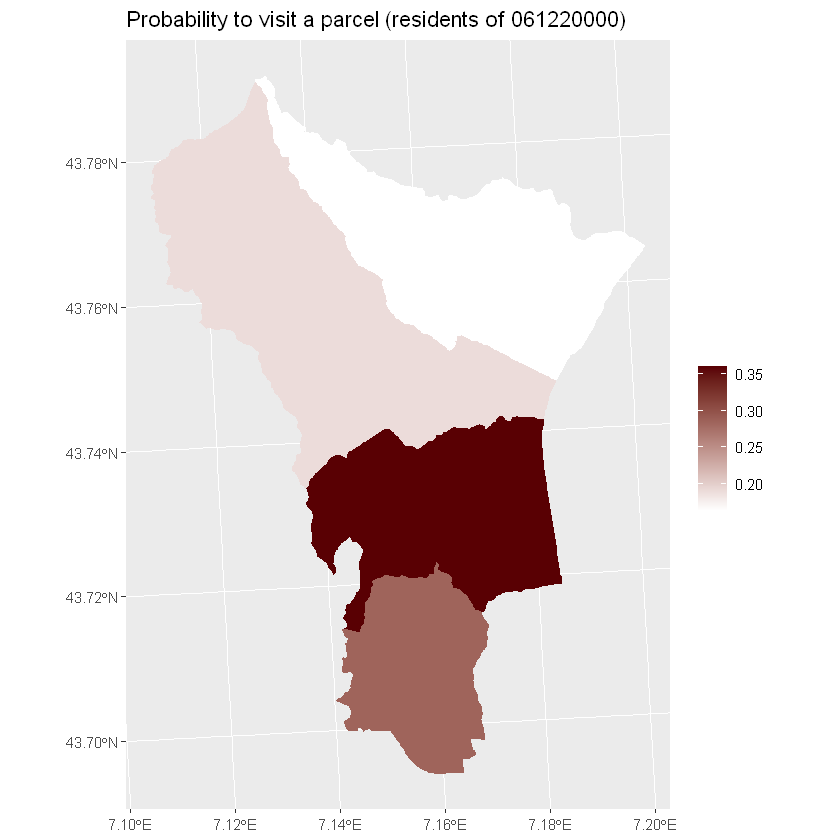

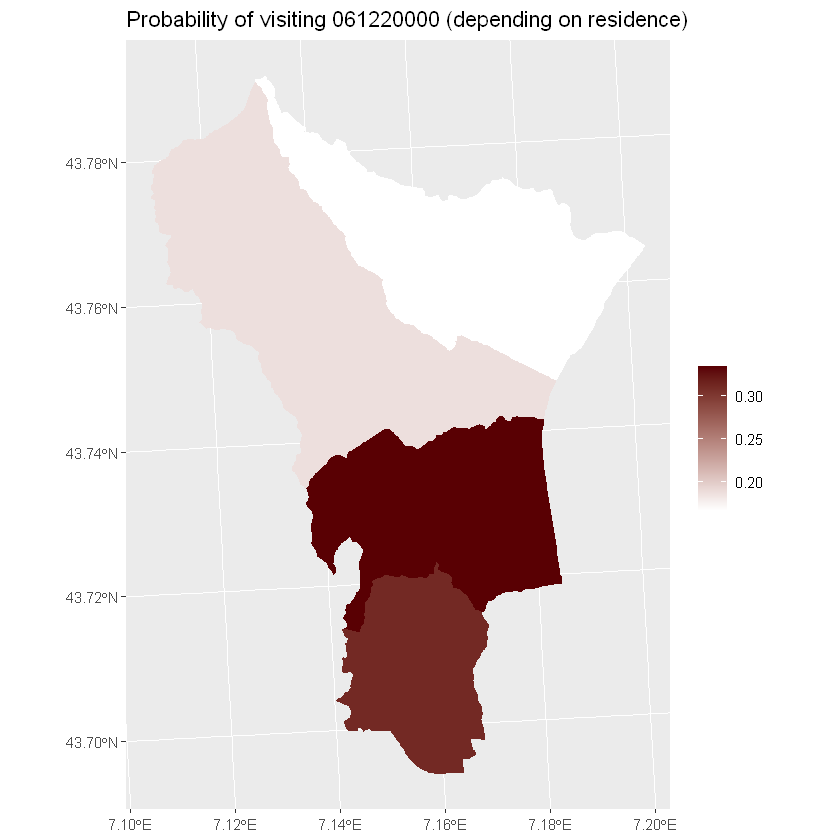

In [18]:
SpatVec <- system.file("shape/SpatVec.shp", package = "arbocartoR") %>% terra::vect(.)
SpatVec <- SpatVec[SpatVec$ID %in% parcels$ID, ]

mMov <- build_mMov(SpatVec,
                   law = "NGravExp",
                   p2move = 0.715,
                   verbose = TRUE)

SpatVec$pMovij <- mMov$proba_ij[rownames(mMov$proba_ij) == "060650102",]
SpatVec$pMovji <- mMov$proba_ji[rownames(mMov$proba_ji) == "060650102",]

ggplot(SpatVec) +
  geom_spatvector(aes(fill = pMovij), color = NA) +
  scale_fill_continuous(low = "white", high = "#590003") +
  ggtitle("Probability to visit a parcel (residents of 061220000)") +
  labs(fill = "")

ggplot(SpatVec) +
  geom_spatvector(aes(fill = pMovji), color = NA) +
  scale_fill_continuous(low = "white", high = "#590003") +
  ggtitle("Probability of visiting 061220000 (depending on residence)") +
  labs(fill = "")

#### Run the simulation with mobility

In [19]:
traj_mMov <- run_arbocartoR(
  vector = "Ae. aegypti",
  parcels = parcels,
  meteo = meteo,
  mMov = mMov,
  n_sim = 1,
  start_date = as.Date("2022/01/01"),
  end_date = as.Date("2022/11/30"),
  introduction_pts = introduction_pts,
  initMosq = 1e5
)

Parameters were based on Ae. aegypti ecology

Simulation will run for 4 parcels from 2022-01-01 to 2022-11-30

## Generating parameters for all patches can take time, please be patient. ##



#### Explore and compare the output

In [20]:
message("Parcels of introduction")
introduction_pts

message("Infected parcels without mobility")
traj[[1]][Eh > 0, unique(ID)] 

message("Infected parcels with mobility")
traj_mMov[[1]][Eh > 0, unique(ID)] 


Parcels of introduction



time       dest      n  select
1 2022-07-09 060650101 10 Eh

Infected parcels without mobility



[1] "060650101"

Infected parcels with mobility



[1] "060650101" "060650102" "060640000" "061220000"